In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [90]:
urban_tree_canopy = pd.read_csv('../../clean_data/greenspace_data/urban_tree_canopy.csv')

In [91]:
urban_tree_canopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933946 entries, 0 to 1933945
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   city_name                object 
 1   census_block             int64  
 2   mean_percent_tree_cover  float64
 3   tree_gap                 float64
 4   surface_temp             float64
 5   income_percent           int64  
 6   income_group             int64  
 7   pop_dens_group           int64  
 8   state_fip                float64
 9   state                    object 
 10  state_name               object 
 11  county_fip               float64
 12  county_name              object 
dtypes: float64(5), int64(4), object(4)
memory usage: 191.8+ MB


In [92]:
#get summary about nan values
urban_tree_canopy.isna().sum()

# get summary about the data
urban_tree_canopy.describe()

,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group,state_fip,county_fip
count,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06,1.933946e+06
mean,2.741910e+14,3.075928e-01,3.659253e-01,2.935542e+01,3.491190e+04,2.550196e+00,1.794755e+00,2.733258e+01,8.632086e+01
std,1.554574e+14,2.174513e-01,1.748744e-01,4.296617e+00,1.971540e+04,1.116230e+00,9.234678e-01,1.551520e+01,1.078183e+02
min,1.003011e+13,0.000000e+00,1.553733e-02,0.000000e+00,-9.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.209901e+14,1.274180e-01,2.288518e-01,2.686646e+01,2.161300e+04,2.000000e+00,1.000000e+00,1.200000e+01,2.900000e+01
50%,2.701909e+14,2.712420e-01,3.565783e-01,2.847721e+01,3.078200e+04,3.000000e+00,2.000000e+00,2.700000e+01,5.900000e+01
75%,4.105100e+14,4.547045e-01,4.785208e-01,3.093000e+01,4.275600e+04,4.000000e+00,2.000000e+00,4.100000e+01,1.030000e+02
max,5.513320e+14,1.000000e+00,7.393691e-01,4.662200e+01,3.057000e+05,4.000000e+00,4.000000e+00,5.500000e+01,8.100000e+02


array([[<AxesSubplot: title={'center': 'census_block'}>,
        <AxesSubplot: title={'center': 'mean_percent_tree_cover'}>,
        <AxesSubplot: title={'center': 'tree_gap'}>],
       [<AxesSubplot: title={'center': 'surface_temp'}>,
        <AxesSubplot: title={'center': 'income_percent'}>,
        <AxesSubplot: title={'center': 'income_group'}>],
       [<AxesSubplot: title={'center': 'pop_dens_group'}>,
        <AxesSubplot: title={'center': 'state_fip'}>,
        <AxesSubplot: title={'center': 'county_fip'}>]], dtype=object)

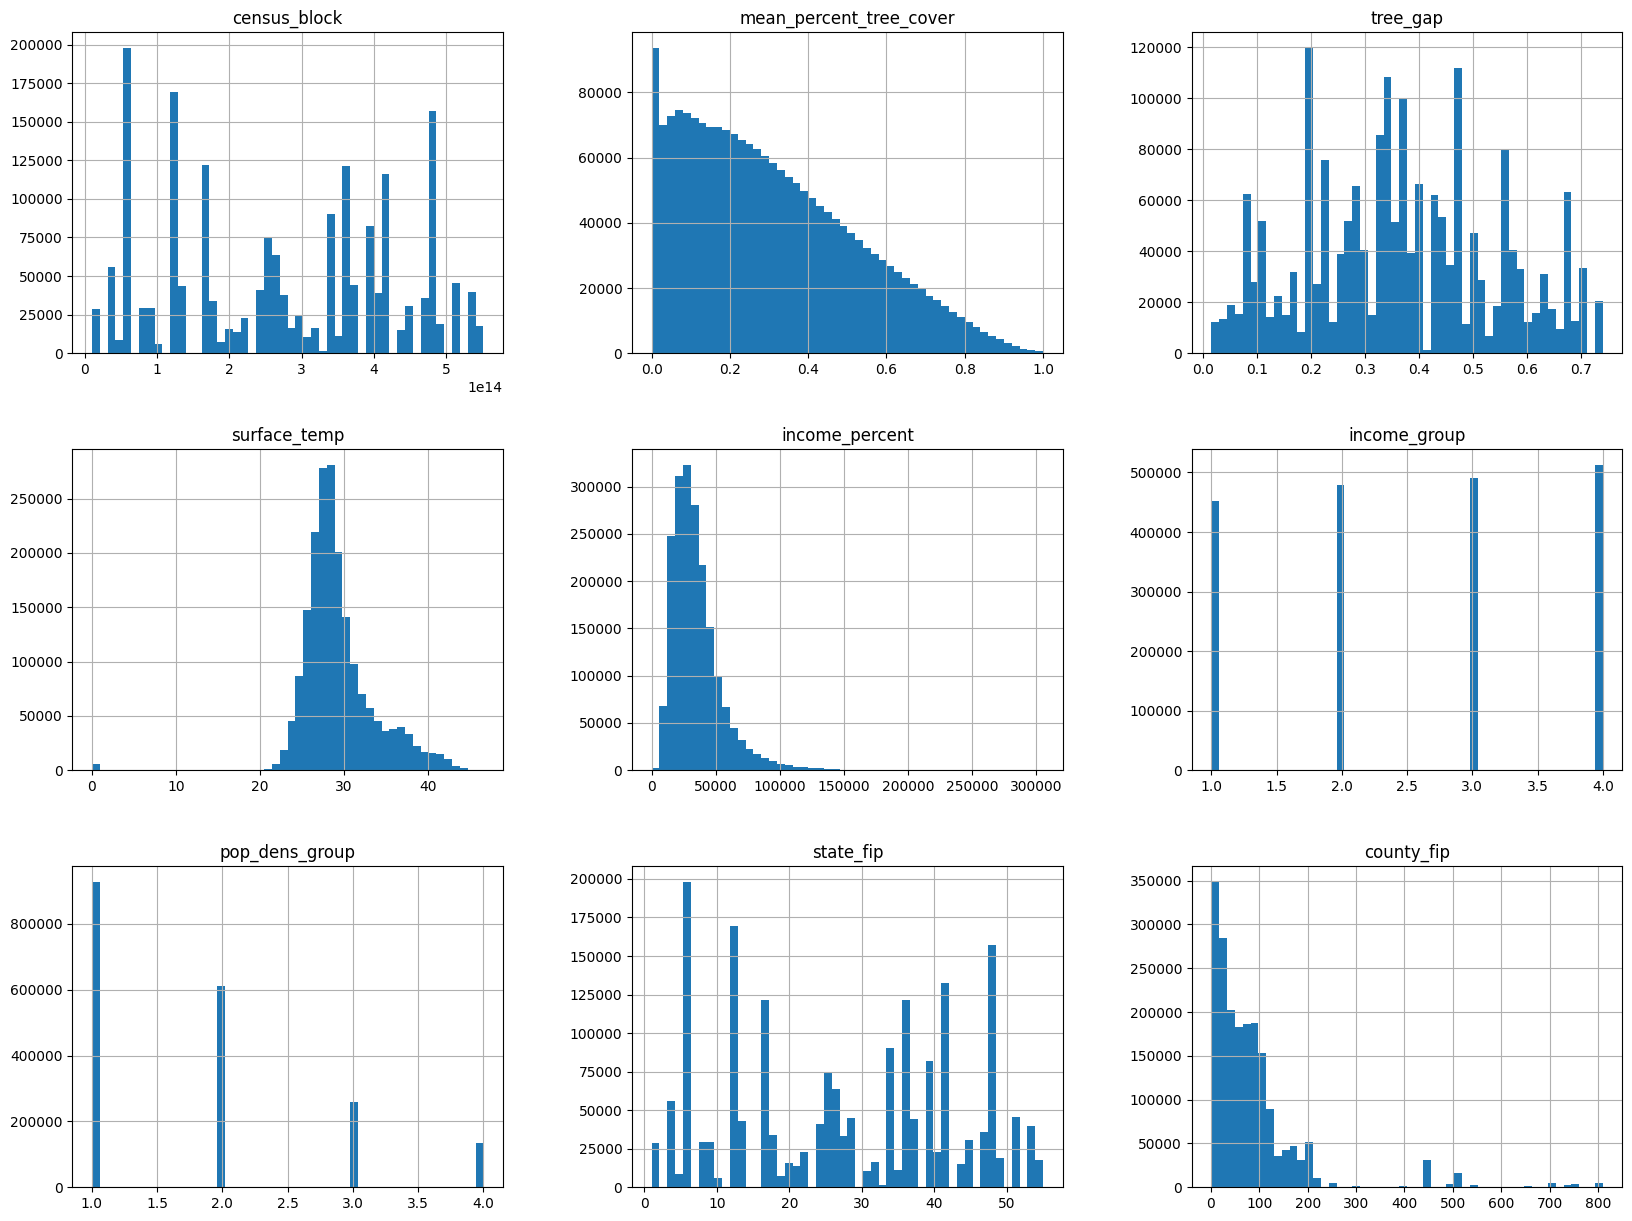

In [93]:
# plot histogram
urban_tree_canopy.hist(bins=50, figsize=(20,15))

In [94]:
urban_tree_canopy.city_name.value_counts()

New York--Newark, NY--NJ--CT            155107
Chicago, IL--IN                         125260
Los Angeles--Long Beach--Anaheim, CA     90196
Philadelphia, PA--NJ--DE--MD             68033
Dallas--Fort Worth--Arlington, TX        59018
                                         ...  
Huntsville, AL                            4745
Hickory, NC                               4691
Fayetteville, NC                          4265
Myrtle Beach--Socastee, SC--NC            4166
Bonita Springs, FL                        3298
Name: city_name, Length: 100, dtype: int64

In [95]:
urban_tree_nyc = urban_tree_canopy[urban_tree_canopy.city_name == 'New York--Newark, NY--NJ--CT']

In [96]:
urban_tree_nyc

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group,state_fip,state,state_name,county_fip,county_name
1223436,"New York--Newark, NY--NJ--CT",360470878002000,0.030497,0.196316,30.425000,12800,1,3,36.0,NY,New York,47.0,Kings County
1223437,"New York--Newark, NY--NJ--CT",340130070001008,0.104074,0.196316,31.654348,19968,1,3,34.0,NJ,New Jersey,13.0,Essex County
1223438,"New York--Newark, NY--NJ--CT",340390311003006,0.294734,0.196316,29.812500,19968,1,3,34.0,NJ,New Jersey,39.0,Union County
1223439,"New York--Newark, NY--NJ--CT",360850009002000,0.419259,0.196316,28.116667,15361,1,3,36.0,NY,New York,85.0,Richmond County
1223440,"New York--Newark, NY--NJ--CT",360470888001003,0.053940,0.196316,29.905556,19201,1,3,36.0,NY,New York,47.0,Kings County
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378538,"New York--Newark, NY--NJ--CT",361032009027051,0.374401,0.558636,26.368182,58897,4,1,36.0,NY,New York,103.0,Suffolk County
1378539,"New York--Newark, NY--NJ--CT",361032009027052,0.019905,0.558636,23.787500,58897,4,1,36.0,NY,New York,103.0,Suffolk County
1378540,"New York--Newark, NY--NJ--CT",361032009027052,0.052743,0.558636,24.057143,58897,4,1,36.0,NY,New York,103.0,Suffolk County
1378541,"New York--Newark, NY--NJ--CT",361032009027054,0.467982,0.558636,24.526000,58897,4,1,36.0,NY,New York,103.0,Suffolk County


In [97]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [98]:
ny_shapefile = gpd.read_file('../../data/external_data/nyct2020_22c/nyct2020.shp')
st_shapefile = gpd.read_file('../eda_arnhav/state_shape_data/usa-states-census-2014.shp')

In [99]:
# ny_shapefile

In [100]:
urban_tree_nyc["tract"] = urban_tree_nyc.census_block.astype(str).str[:11]
ny_shapefile.GEOID = ny_shapefile.GEOID.astype(str)

# groupby tract and get the mean of the tree canopy
urban_tree_nyc = urban_tree_nyc.groupby('tract').mean().reset_index()
merged = ny_shapefile.merge(urban_tree_nyc, left_on='GEOID', right_on='tract', how='left')

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_83379/963314273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_tree_nyc["tract"] = urban_tree_nyc.census_block.astype(str).str[:11]
/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_83379/963314273.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urban_tree_nyc = urban_tree_nyc.groupby('tract').mean().reset_index()


In [101]:
#fill na
merged.mean_percent_tree_cover.fillna(0, inplace=True)
# merged.info()

In [102]:
merged.columns

Index(['CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil',
       'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'Shape_Leng',
       'Shape_Area', 'geometry', 'tract', 'census_block',
       'mean_percent_tree_cover', 'tree_gap', 'surface_temp', 'income_percent',
       'income_group', 'pop_dens_group', 'state_fip', 'county_fip'],
      dtype='object')

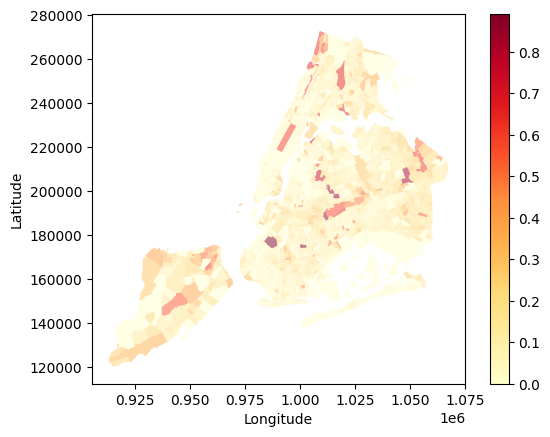

In [103]:
# Create a Basemap instance and have a heatmap of the tree canopy
m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)
merged.plot(ax=m.ax, column='mean_percent_tree_cover', cmap='YlOrRd', alpha=0.5, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
acc = pd.read_csv('../../data/external_data/NYC Accidents 2020.csv')

In [105]:
acc.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)

In [106]:
len(acc), len(ny_shapefile)

(68935, 2325)

In [107]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import os

geometry = [Point(xy) for xy in zip(acc.LONGITUDE, acc.LATITUDE)]
point_series = gpd.GeoSeries(geometry)
points_gdf = gpd.GeoDataFrame(point_series, geometry=point_series)
points_gdf.crs = {'init': 'epsg:4326'}
points_gdf = points_gdf.to_crs('EPSG:2263')

merged_file = gpd.sjoin(points_gdf, ny_shapefile, op='within', how='inner')

merged_df = pd.DataFrame(merged_file)

/Users/yashgupta/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/yashgupta/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [108]:
acc_ct = merged_df[['index_right', 'GEOID']].groupby('GEOID').count().reset_index()

In [109]:
acc_ct["tract"] = acc_ct.GEOID.astype(str).str[:11]
ny_shapefile.GEOID = ny_shapefile.GEOID.astype(str)

# groupby tract and get the mean of the tree canopy
acc_ct = acc_ct.groupby('tract').mean().reset_index()
merged_acc = ny_shapefile.merge(acc_ct, left_on='GEOID', right_on='tract', how='left')

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_83379/1625630605.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acc_ct = acc_ct.groupby('tract').mean().reset_index()


In [110]:
merged_acc.index_right.fillna(0, inplace=True)

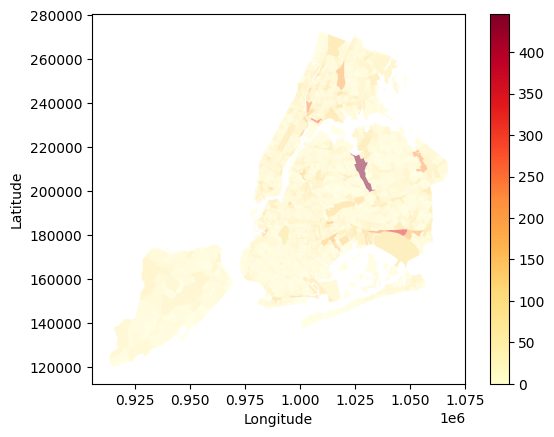

In [111]:
# Create a Basemap instance and have a heatmap of the tree canopy
m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)
merged_acc.plot(ax=m.ax, column='index_right', cmap='YlOrRd', alpha=0.5, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [112]:
# calculate the correlation between the two
df1 = merged[['GEOID', 'mean_percent_tree_cover']]
df2 = merged_acc[['GEOID', 'index_right']]

df3 = df1.merge(df2, on='GEOID', how='inner')

corr = df3.corr()

/var/folders/5t/fxl9hmt15b9gy4kpwg48tz2w0000gn/T/ipykernel_83379/4274449651.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


In [113]:
corr

,mean_percent_tree_cover,index_right
mean_percent_tree_cover,1.000000,-0.030171
index_right,-0.030171,1.000000


In [114]:
# do linear regression to see the relationship between the two
from sklearn import linear_model, feature_selection
reg = linear_model.LinearRegression()
reg.fit(df3[['mean_percent_tree_cover']], df3['index_right'])
reg.coef_, reg.intercept_

# do p value test
print('p-value: ', feature_selection.f_regression(df3[['mean_percent_tree_cover']], df3['index_right'])[1])

p-value:  [0.14584765]


In [115]:
df3

,GEOID,mean_percent_tree_cover,index_right
0,36061000100,0.370648,0.0
1,36061000201,0.170469,21.0
2,36061000600,0.149918,30.0
3,36061001401,0.282317,12.0
4,36061001402,0.072127,38.0
...,...,...,...
2320,36081076902,0.151428,42.0
2321,36081029900,0.000000,11.0
2322,36081031700,0.245994,75.0
2323,36047079201,0.000000,25.0


In [121]:
df = gpd.read_file("/Users/yashgupta/Downloads/tl_2020_36001_tract10/tl_2020_36001_tract10.shp")

In [127]:
df

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,001,000100,36001000100,1,Census Tract,G5020,S,2367456,245021,+42.6637545,-073.7369092,"POLYGON ((-73.74542 42.67113, -73.74506 42.672..."
1,36,001,000200,36001000200,2,Census Tract,G5020,S,2065161,0,+42.6644127,-073.7515041,"POLYGON ((-73.76160 42.65834, -73.76110 42.658..."
2,36,001,000300,36001000300,3,Census Tract,G5020,S,5757438,55326,+42.6805797,-073.7828932,"POLYGON ((-73.83062 42.69336, -73.83059 42.693..."
3,36,001,000401,36001000401,4.01,Census Tract,G5020,S,9065815,86327,+42.7026692,-073.8668421,"POLYGON ((-73.89421 42.70977, -73.89575 42.710..."
4,36,001,000403,36001000403,4.03,Census Tract,G5020,S,3138700,0,+42.6768745,-073.8052643,"POLYGON ((-73.82591 42.67759, -73.82558 42.677..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,36,001,014615,36001014615,146.15,Census Tract,G5020,S,5866664,216734,+42.6889489,-073.9123120,"POLYGON ((-73.93897 42.70008, -73.93757 42.702..."
71,36,001,014700,36001014700,147,Census Tract,G5020,S,108164311,451486,+42.6853531,-074.1056328,"POLYGON ((-74.19173 42.62827, -74.19164 42.628..."
72,36,001,014801,36001014801,148.01,Census Tract,G5020,S,165837030,1822037,+42.6039157,-074.1303637,"POLYGON ((-74.24102 42.55182, -74.24099 42.551..."
73,36,001,014802,36001014802,148.02,Census Tract,G5020,S,159191854,1088427,+42.4794765,-074.1786077,"POLYGON ((-74.26486 42.41986, -74.26473 42.420..."


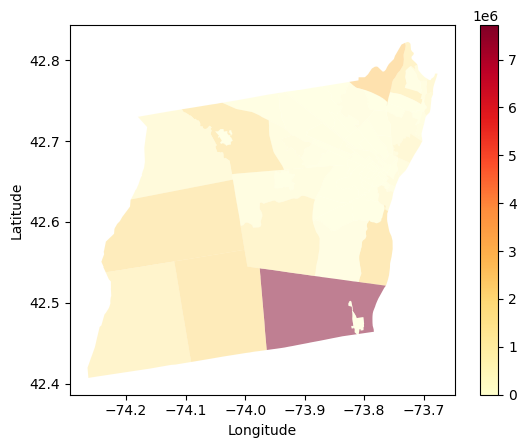

In [128]:
m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)
df.plot(ax=m.ax, column='AWATER10', cmap='YlOrRd', alpha=0.5, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()